In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file.jpg'
    ela_filename = 'temp_ela_file.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image

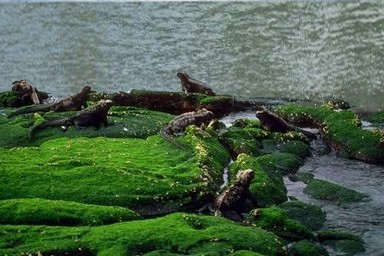

In [3]:
real_image_path = r"C:\Users\Akhila\Downloads\Tp\Tp_D_CND_M_N_ani00018_sec00096_00138.tif"
Image.open(real_image_path)

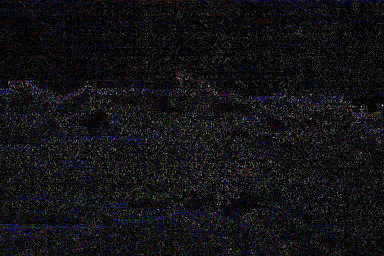

In [4]:
convert_to_ela_image(real_image_path, 85)

In [5]:
image_size = (224, 224)

def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path,85).resize(image_size)).flatten()/255.0

In [6]:
X = [] #ELA converted images
Y = [] # 0 for fake , 1 for real

In [7]:
import random
count = 0
path = 'C:\\Users\\Akhila\\Downloads\\Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
#         count+=1
#         if count < 1000:
#             pass
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)  
        if len(Y) % 5000 == 0:
            print(f'Processing {len(Y)} images')
            break
    if len(Y) % 5000 == 0:
        break

random.shuffle(X)
print(len(X), len(Y))

Processing 5000 images
5000 5000


In [ ]:
path = 'C:\\Users\\Akhila\\Downloads\\Tp'
count = 0
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
#         count += 1
#         if count < 1000:
#             pass
        if filename.endswith('jpg') or filename.endswith('tif'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
        if len(Y) % 10000 == 0:
            print(f'Processing {len(Y)} images')
            break
    if len(Y) % 10000 == 0:
        break

print(len(X), len(Y))

In [29]:
au,tp=0,0
for i in Y:
    if(i==1):
        au+=1
    else:
        tp+=1
print(tp,au)

2064 5000
